## AVAZU CTR PROJECT
CTR:In online advertising, click-through rate (CTR) is a very important metric for evaluating ad performance. As a result, click prediction systems are essential and widely used for sponsored search and real-time bidding.
Data Rources:https://www.kaggle.com/c/avazu-ctr-prediction/overview
I randomly choose 20000 units as subset in order to write it as example.
The Content for the project.
1. Data Import
2. EDA (Exploratory data analysis)
3. Feature Engineering
4. Model application& Parameter tuning
5. Model Evalutions
6. Next Steps

## 1. Data import

Evaluation summary
Precision: ROI on ad spend through clicks
- low precision means that very little tangible ROI on clicks
Recall: targeting on relevant audience
- low recall means missed out opportunties on ROI

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn. preprocessing import StandardScaler
import sklearn
from sklearn.metrics import confusion_matrix,precision_score,recall_score, roc_curve,auc,accuracy_score,fbeta_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neural_network import MLPClassifier 

In [74]:
## df=pd.read_csv('train.csv')

In [4]:
## df_new=df.sample(n=20000)

In [75]:
df_new=pd.read_csv('df_new.csv')

## 2. EDA
Looked at specific features and variability with CTR
dtypes,
columns,
missing_values,
Frequencies,CTR groupby specific features

In [76]:
df_new.head()

,Unnamed: 0,id,click,hour,search_engine_type,banner_pos,site_id,site_domain,site_category,app_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,product_type,C20,advertiser_type
0,3663003,1.328999e+19,1,14102119,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,...,1,0,21725,320,50,2502,0,35,100083,221
1,22233842,1.354796e+19,0,14102613,1005,0,89a490f5,ce307e01,3e814130,ecad2386,...,1,0,20009,320,50,2283,0,163,100076,95
2,24722828,1.367056e+19,0,14102707,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,...,1,0,18091,320,50,2060,3,39,-1,23
3,13789200,1.338143e+19,0,14102404,1005,0,6399eda6,968765cd,f028772b,ecad2386,...,1,2,19950,320,50,1800,3,167,100075,23
4,38864797,1.119810e+18,0,14103014,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,...,1,0,19016,300,250,2162,2,39,-1,33


In [77]:
df_new.dtypes

Unnamed: 0              int64
id                    float64
click                   int64
hour                    int64
search_engine_type      int64
banner_pos              int64
site_id                object
site_domain            object
site_category          object
app_id                 object
app_domain             object
app_category           object
device_id              object
device_ip              object
device_model           object
device_type             int64
device_conn_type        int64
C14                     int64
C15                     int64
C16                     int64
C17                     int64
C18                     int64
product_type            int64
C20                     int64
advertiser_type         int64
dtype: object

In [78]:
df_new.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'search_engine_type', 'banner_pos',
       'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'product_type',
       'C20', 'advertiser_type'],
      dtype='object')

In [79]:
np.sum(df_new.isnull())

Unnamed: 0            0
id                    0
click                 0
hour                  0
search_engine_type    0
banner_pos            0
site_id               0
site_domain           0
site_category         0
app_id                0
app_domain            0
app_category          0
device_id             0
device_ip             0
device_model          0
device_type           0
device_conn_type      0
C14                   0
C15                   0
C16                   0
C17                   0
C18                   0
product_type          0
C20                   0
advertiser_type       0
dtype: int64

In [80]:
df_new.isnull().sum(axis=1).sum()

0

In [81]:
df_new=df_new.rename(columns={'C1':'search_engine_type','C19':'product_type','C21':'advertiser_type'})

In [82]:
se_df=df_new.groupby(['search_engine_type','click']).size().unstack()

<AxesSubplot:title={'center':'value frequency for search engine type'}, xlabel='search_engine_type'>

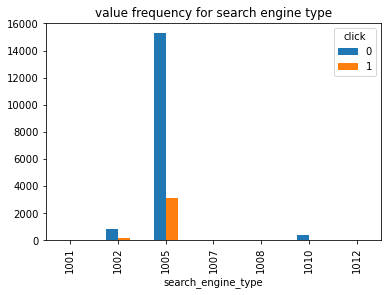

In [83]:
se_df.plot(kind='bar',title='value frequency for search engine type')

In [84]:
se_df=se_df.reset_index()
se_df=se_df.rename(columns={0:'non_clicks',1:'clicks'})

In [85]:
## CTR for different search engine type
se_df['total']=se_df['non_clicks']+se_df['clicks']
se_df['CTR']=se_df['clicks']/se_df['total']
print(se_df.sort_values(by='CTR'))

click  search_engine_type  non_clicks  clicks    total       CTR
0                    1001         6.0     NaN      NaN       NaN
1                    1002       874.0   208.0   1082.0  0.192237
2                    1005     15268.0  3115.0  18383.0  0.169450
3                    1007        19.0     2.0     21.0  0.095238
4                    1008         6.0     NaN      NaN       NaN
5                    1010       408.0    46.0    454.0  0.101322
6                    1012        39.0     9.0     48.0  0.187500


In [196]:
## CTR for different product type
se_df=df_new.groupby(['product_type','click']).size().unstack()
se_df=se_df.reset_index()
se_df=se_df.rename(columns={0:'non_clicks',1:'clicks'})
se_df['total']=se_df['non_clicks']+se_df['clicks']
se_df['CTR']=se_df['clicks']/se_df['total']
print(se_df.sort_values(by='CTR'))

click  product_type  non_clicks  clicks  total       CTR
9               161       738.0    19.0  757.0  0.025099
31              559        24.0     1.0   25.0  0.040000
33              675        44.0     2.0   46.0  0.043478
22              419       164.0     8.0  172.0  0.046512
39              803       210.0    12.0  222.0  0.054054
..              ...         ...     ...    ...       ...
36              683         1.0     NaN    NaN       NaN
46              939         NaN     3.0    NaN       NaN
47              943         5.0     NaN    NaN       NaN
57             1583         3.0     NaN    NaN       NaN
60             1835        11.0     NaN    NaN       NaN

[62 rows x 5 columns]


In [198]:
## CTR for different advertiser_type
se_df=df_new.groupby(['advertiser_type','click']).size().unstack()
se_df=se_df.reset_index()
se_df=se_df.rename(columns={0:'non_clicks',1:'clicks'})
se_df['total']=se_df['non_clicks']+se_df['clicks']
se_df['CTR']=se_df['clicks']/se_df['total']
print(se_df.sort_values(by='CTR'))

click  advertiser_type  non_clicks  clicks   total       CTR
50                 204        45.0     1.0    46.0  0.021739
21                  76        72.0     2.0    74.0  0.027027
20                  71       967.0    33.0  1000.0  0.033000
34                 110        73.0     4.0    77.0  0.051948
55                 246       105.0     6.0   111.0  0.054054
54                 229       210.0    12.0   222.0  0.054054
56                 251        17.0     1.0    18.0  0.055556
28                  95       133.0     8.0   141.0  0.056738
40                 156       164.0    10.0   174.0  0.057471
16                  61       966.0    62.0  1028.0  0.060311
30                 101        31.0     2.0    33.0  0.060606
51                 212       307.0    22.0   329.0  0.066869
4                   17        75.0     6.0    81.0  0.074074
47                 182        25.0     2.0    27.0  0.074074
25                  91        56.0     5.0    61.0  0.081967
11                  43  

## 3. Feature engineering
(1)Variable processing 
create hour --- hour of day
(2)categorial processing
hash(x)
(3)features_count
(4)Standarization
4.1 Apply log normalization on columns with higher than median variance
4.2 Transform columns using StandardScaler

### Variable processing

In [86]:
df_new['hour'] = pd.to_datetime(df_new['hour'], format = '%y%m%d%H')
df_new['hour_of_day'] = df_new['hour'].dt.hour

In [87]:
print(df_new)

       Unnamed: 0            id  click                hour  \
0         3663003  1.328999e+19      1 2014-10-21 19:00:00   
1        22233842  1.354796e+19      0 2014-10-26 13:00:00   
2        24722828  1.367056e+19      0 2014-10-27 07:00:00   
3        13789200  1.338143e+19      0 2014-10-24 04:00:00   
4        38864797  1.119810e+18      0 2014-10-30 14:00:00   
...           ...           ...    ...                 ...   
19995    36981302  1.167163e+19      0 2014-10-30 05:00:00   
19996    38647342  1.343334e+19      0 2014-10-30 13:00:00   
19997    25610131  1.568756e+19      0 2014-10-27 13:00:00   
19998    36320507  1.420271e+19      0 2014-10-30 01:00:00   
19999    30466462  7.561137e+18      0 2014-10-28 14:00:00   

       search_engine_type  banner_pos   site_id site_domain site_category  \
0                    1005           0  1fbe01fe    f3845767      28905ebd   
1                    1005           0  89a490f5    ce307e01      3e814130   
2                    100

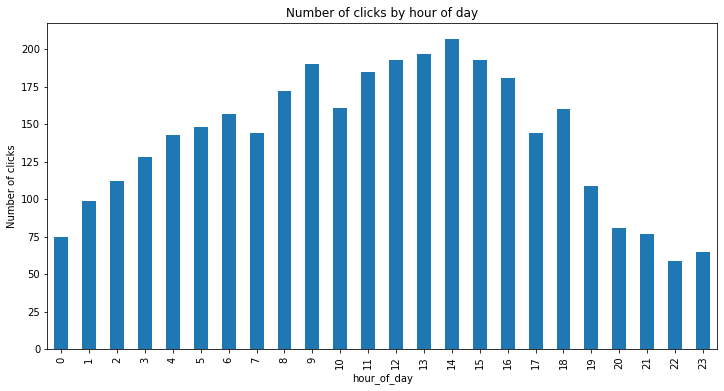

In [88]:
# Get and plot total clicks by hour of day
df_new.groupby('hour_of_day')['click'].sum().plot.bar(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.title('Number of clicks by hour of day')
plt.show()

In [89]:
##categorial processing
categorial_cols=df_new.select_dtypes(include=['object']).columns.tolist()
for col in categorial_cols:
    df_new[col]= df_new[col].apply(lambda x:hash(x))

In [90]:
df_new.head()

,Unnamed: 0,id,click,hour,search_engine_type,banner_pos,site_id,site_domain,site_category,app_id,...,device_conn_type,C14,C15,C16,C17,C18,product_type,C20,advertiser_type,hour_of_day
0,3663003,1.328999e+19,1,2014-10-21 19:00:00,1005,0,4434902062798931880,-7949737045604288452,-2522620493032896879,-6372487308215151456,...,0,21725,320,50,2502,0,35,100083,221,19
1,22233842,1.354796e+19,0,2014-10-26 13:00:00,1005,0,-7509233640368011396,4108338812881778546,3107277090511135029,-6372487308215151456,...,0,20009,320,50,2283,0,163,100076,95,13
2,24722828,1.367056e+19,0,2014-10-27 07:00:00,1005,0,-6648841929243426612,-540229382530709525,-6502660151715606893,8970105218406350399,...,0,18091,320,50,2060,3,39,-1,23,7
3,13789200,1.338143e+19,0,2014-10-24 04:00:00,1005,0,5362171089439795233,8071600283347957249,-4782788504019978487,-6372487308215151456,...,2,19950,320,50,1800,3,167,100075,23,4
4,38864797,1.119810e+18,0,2014-10-30 14:00:00,1005,0,469122119204043543,7863201858812251847,3107277090511135029,-6372487308215151456,...,0,19016,300,250,2162,2,39,-1,33,14


In [91]:
# Get counts of total and unique values for given features
feature_list = ["search_engine_type", "product_type", "advertiser_type"]
for feature in feature_list:
    print(df_new[feature].count())
    print(df_new[feature].nunique())

20000
7
20000
62
20000
59


In [92]:
new_feature_list = ['device_id', 'site_id'] + feature_list
for new_feature in new_feature_list:
    df_new[new_feature + '_count'] = df_new.groupby(
    new_feature)['click'].transform("count")
print(df_new.head(5))

   Unnamed: 0            id  click                hour  search_engine_type  \
0     3663003  1.328999e+19      1 2014-10-21 19:00:00                1005   
1    22233842  1.354796e+19      0 2014-10-26 13:00:00                1005   
2    24722828  1.367056e+19      0 2014-10-27 07:00:00                1005   
3    13789200  1.338143e+19      0 2014-10-24 04:00:00                1005   
4    38864797  1.119810e+18      0 2014-10-30 14:00:00                1005   

   banner_pos              site_id          site_domain        site_category  \
0           0  4434902062798931880 -7949737045604288452 -2522620493032896879   
1           0 -7509233640368011396  4108338812881778546  3107277090511135029   
2           0 -6648841929243426612  -540229382530709525 -6502660151715606893   
3           0  5362171089439795233  8071600283347957249 -4782788504019978487   
4           0   469122119204043543  7863201858812251847  3107277090511135029   

                app_id  ...  C18  product_type    

### Standarization

In [93]:
num_df = df_new.select_dtypes(include=['int', 'float'])
print(num_df.columns)

Index(['Unnamed: 0', 'id', 'click', 'search_engine_type', 'banner_pos',
       'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'product_type',
       'C20', 'advertiser_type', 'hour_of_day', 'device_id_count',
       'site_id_count', 'search_engine_type_count', 'product_type_count',
       'advertiser_type_count'],
      dtype='object')


In [94]:
filter_cols = ['click', 'banner_pos', 'device_type',
               'search_engine_type', 'product_type', 'advertiser_type']
new_df = num_df[num_df.columns[~num_df.columns.isin(filter_cols)]]
print(new_df.columns)
median = new_df.var().median()
print(median)

Index(['Unnamed: 0', 'id', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C20',
       'hour_of_day', 'device_id_count', 'site_id_count',
       'search_engine_type_count', 'product_type_count',
       'advertiser_type_count'],
      dtype='object')
1268691659.4780107


In [95]:
# Apply log normalization on columns with higher than median variance
change_cols = new_df.columns[new_df.var() > median].tolist()
new_df[change_cols] = new_df[change_cols].apply(
  lambda x: np.log(x))
print(new_df.var().median())

1.6925290263834554


/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [96]:
# Transform columns using StandardScaler
scaler =StandardScaler()
df_new[num_cols] = scaler.fit_transform(df_new[num_cols])
# Print mean and variance of transformed columns
print(df_new[num_cols].mean())
print(df_new[num_cols].var())

id                         -4.959921e-18
site_id                    -1.639466e-16
device_conn_type           -2.990663e-16
device_id_count            -2.609302e-16
site_id_count               2.062905e-16
search_engine_type_count    8.708423e-16
product_type_count          3.049894e-16
advertiser_type_count       9.018897e-17
dtype: float64
id                          1.00005
site_id                     1.00005
device_conn_type            1.00005
device_id_count             1.00005
site_id_count               1.00005
search_engine_type_count    1.00005
product_type_count          1.00005
advertiser_type_count       1.00005
dtype: float64


In [97]:
df_new.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'search_engine_type', 'banner_pos',
       'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'product_type',
       'C20', 'advertiser_type', 'hour_of_day', 'device_id_count',
       'site_id_count', 'search_engine_type_count', 'product_type_count',
       'advertiser_type_count'],
      dtype='object')

## 4. Model Application & Parameters tuning 
(1) Logitic Regression
(2) Decision Tree
(3) Random Forest
(4) MLPClassifier
Create list of hyperparameters 
Use Grid search CV to find best parameters 

In [99]:
# Set up classifier using training data to predict test data
x=df_new.loc[:,~df_new.columns.isin(['click'])]

In [107]:
df_new.columns

Index(['Unnamed: 0', 'id', 'click', 'hour', 'search_engine_type', 'banner_pos',
       'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'product_type',
       'C20', 'advertiser_type', 'hour_of_day', 'device_id_count',
       'site_id_count', 'search_engine_type_count', 'product_type_count',
       'advertiser_type_count'],
      dtype='object')

In [111]:
filter_cols = ['hour', 'search_engine_type', 'banner_pos',
       'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
       'app_category', 'device_id', 'device_ip', 'device_model', 'device_type',
       'device_conn_type','product_type',
       'C20', 'advertiser_type', 'hour_of_day', 'device_id_count',
       'site_id_count', 'search_engine_type_count', 'product_type_count',
       'advertiser_type_count']
new_df2 = df_new.loc[:,df_new.columns.isin(filter_cols)]
print(new_df2.columns)

Index(['hour', 'search_engine_type', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type',
       'product_type', 'C20', 'advertiser_type', 'hour_of_day',
       'device_id_count', 'site_id_count', 'search_engine_type_count',
       'product_type_count', 'advertiser_type_count'],
      dtype='object')


In [129]:
new_df2['hour']=pd.to_numeric(new_df2['hour'])

<ipython-input-129-da1a88d46981>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df2['hour']=pd.to_numeric(new_df2['hour'])


In [112]:
y=df_new.click

In [106]:
#CTR
print("sample CTR :\n",y.sum()/len(y))

sample CTR :
 0.169


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
  new_df2, y, test_size = .2, random_state = 0)

### DecisionTree

In [130]:
clf = DecisionTreeClassifier()

In [131]:
y_pred = clf.fit(x_train, y_train).predict(x_test) 

In [134]:
# Define confusion matrix and four categories
conf_matrix = confusion_matrix(y_test, y_pred)
tn = conf_matrix[0][0]
fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
tp = conf_matrix[1][1]

print("TN: %s, FP: %s, FN: %s, TP: %s" %(tn, fp, fn, tp))

TN: 2785, FP: 589, FN: 459, TP: 167


In [135]:
## ROI
# Calculate total return, total spent, and ROI
r = 0.2
cost = 0.05
total_return = tp * r
total_cost = (tp + fp) * cost 
roi = total_return / total_cost
print("Total return: %s, Total cost: %s, ROI: %s" %(
  total_return, total_cost, roi))

Total return: 33.4, Total cost: 37.800000000000004, ROI: 0.8835978835978835


In [138]:
### Evaluate precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
print("Precision: %s, Recall: %s" %(prec, recall))

Precision: 0.758722277676655, Recall: 0.738


### Logistic regression

In [187]:
# Create and fit classifier
clf = LogisticRegression()
y_pred = clf.fit(x_train, y_train).predict(x_test) 
y_score = clf.fit(x_train, y_train).predict_proba(x_test) 
# Calculate total return, total spent, and ROI 
r, cost = 0.2, 0.05
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
total_return = tp * r
total_spent = (tp + fp) * cost 
roi = total_return / total_spent
prec = precision_score(y_test, y_pred, average = 'weighted')
roc_auc = roc_auc_score(y_test, y_score[:, 1])
print("ROI: %s, Precision: %s,AUC of ROC curve:%s" %( roi, prec, roc_auc))

ROI: nan, Precision: 0.697225,AUC of ROC curve:0.6225880058065687


<ipython-input-187-6611609ed55c>:10: RuntimeWarning: invalid value encountered in double_scalars
  roi = total_return / total_spent
/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Not works..Choose Decision Tree model

### Optimization

### Decision Tree

In [165]:
for max_depth_val in [2, 3, 5, 10, 15, 20]:
    k_fold = KFold(n_splits= 4)
    clf = DecisionTreeClassifier(max_depth = max_depth_val)
    print("Evaluating Decision Tree for max_depth = %s" %(max_depth_val))
    y_pred = clf.fit(x_train, y_train).predict(x_test) 
  
  # Calculate precision for cross validation and test
    cv_precision = cross_val_score(
    clf, x_train, y_train, cv = k_fold, scoring = 'precision_weighted')
    precision = precision_score(y_test, y_pred, average = 'weighted')
    print("Cross validation Precision: %s" %(cv_precision))
    print("Test Precision: %s" %(precision))

Evaluating Decision Tree for max_depth = 2
Cross validation Precision: [0.68434256 0.68517006 0.674041   0.69806025]
Test Precision: 0.71149225
Evaluating Decision Tree for max_depth = 3


/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yanzhenlei/opt/anaconda3/lib/python3

Cross validation Precision: [0.68434256 0.68517006 0.674041   0.75331804]
Test Precision: 0.71149225
Evaluating Decision Tree for max_depth = 5
Cross validation Precision: [0.76391849 0.77079215 0.75557574 0.74541596]
Test Precision: 0.7702151973131822
Evaluating Decision Tree for max_depth = 10
Cross validation Precision: [0.74834542 0.74687128 0.74211881 0.7507942 ]
Test Precision: 0.7610478957019544
Evaluating Decision Tree for max_depth = 15
Cross validation Precision: [0.74271706 0.73899492 0.74423279 0.74796135]
Test Precision: 0.7603252855120273
Evaluating Decision Tree for max_depth = 20
Cross validation Precision: [0.74425977 0.74457349 0.73348737 0.74576353]
Test Precision: 0.7648198952784833


In [183]:
# Create model 
clf = DecisionTreeClassifier(max_depth=5)

# Set up k-fold
k_fold = KFold()

# Evaluate precision and recall for each fold
precision = cross_val_score(clf, x_train, y_train, cv = k_fold, scoring = 'precision_weighted')
recall = cross_val_score(clf, x_train, y_train, cv =k_fold, scoring = 'recall_weighted')
fbeta = fbeta_score(y_test, y_pred, beta  = 0.5, average = 'weighted')
print("Precision: %s, Recall: %s, F-Beta : %s" %(precision, recall,fbeta))

Precision: [0.75606824 0.75714503 0.77294062 0.76431025 0.77851485], Recall: [0.8275    0.829375  0.8290625 0.8215625 0.828125 ], F-Beta : 0.7402041684020548


### Randomforest

In [163]:
# Create list of hyperparameters 
n_estimators = [10, 20,50,80,100]
max_depth = [3, 5,10,20]
param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Use Grid search CV to find best parameters 
print("starting RF grid search.. ")
rf = RandomForestClassifier()
clf = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'roc_auc')
clf.fit(x_train, y_train)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)

starting RF grid search.. 
Best Score: 
0.7037666697116769
Best Estimator: 
RandomForestClassifier(max_depth=10, n_estimators=80)


In [181]:
# Create random forest classifier with specified params
clf = RandomForestClassifier(n_estimators = 80, max_depth = 10)

# Train classifier - predict probability score and label
y_score = clf.fit(x_train, y_train).predict_proba(x_test) 
y_pred = clf.fit(x_train, y_train).predict(x_test) 

# Get ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
print("ROC of AUC: %s"%(auc(fpr, tpr)))

# Get precision and recall
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
fbeta = fbeta_score(y_test, y_pred, beta  = 0.5, average = 'weighted')
print("Precision: %s, Recall: %s, F-Beta : %s" %(precision, recall,fbeta))

ROC of AUC: 0.6979441117764471
Precision: 0.7846571716662465, Recall: 0.83525, F-Beta : 0.7402041684020548


### Deep Learning

In [177]:
# Create list of hyperparameters 
max_iter = [10, 20,50,100]
hidden_layer_sizes = [(4,),(8,), (16,), (20,)]
param_grid = {'max_iter': max_iter, 'hidden_layer_sizes': hidden_layer_sizes}

# Use Grid search CV to find best parameters using 4 jobs
mlp = MLPClassifier()
clf = GridSearchCV(estimator = mlp, param_grid =param_grid, 
           scoring = 'roc_auc', n_jobs = 4)
clf.fit(x_train, y_train)
print("Best Score: ")
print(clf.best_score_)
print("Best Estimator: ")
print(clf.best_estimator_)

Best Score: 
0.6710547262515745
Best Estimator: 
MLPClassifier(hidden_layer_sizes=(20,), max_iter=100)


/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [178]:
# Scale features and split into training and testing
x = StandardScaler().fit_transform(new_df2)
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size = .2)

# Create classifier and produce predictions
clf = MLPClassifier(hidden_layer_sizes = (20, ), max_iter = 100)
y_score = clf.fit(x_train, y_train).predict_proba(x_test) 
y_pred = clf.fit(x_train, y_train).predict(x_test) 

# Get accuracy and AUC of ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
print("Accuracy: %s" %(accuracy_score(y_test, y_pred)))
print("ROC of AUC curve: %s" %(roc_auc))

/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.83275
ROC of AUC curve: 0.6635515332970423


/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [180]:
# Evaluate precision and recall
prec = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
fbeta = fbeta_score(y_test, y_pred, beta  = 0.5, average = 'weighted')
print("Precision: %s, Recall: %s, F-beta score: %s" %(prec, recall, fbeta))

Precision: 0.7678272235711199, Recall: 0.83275, F-beta score: 0.742211886845039


In [186]:
# Evaluate the ROI
prec = precision_score(y_test, y_pred, average = 'weighted')
r = 0.2
cost = 0.05 
roi = prec * r / cost
# Get AUC
roc_auc = roc_auc_score(y_test, y_score[:, 1])
print("Total ROI: %s, Precision: %s, AUC of ROC curve: %s" %(
  roi, prec, roc_auc))

Total ROI: 3.138628686664986, Precision: 0.7846571716662465, AUC of ROC curve: 0.6979441117764471


## 5. Evaluation
Create list of classifiers
Produce a classification report for all classifiers
** ROI(precision_score) *r /cost
** Recall- sensitivity = TP / (TP + FN)
** precision - positive predictive value = TP / (TP + FP)
** F-beta: F-Measure = (2 * Precision * Recall) / (Precision + Recall)
** AUC-ROC score. It tells how much the model is capable of distinguishing between classes. 

In [191]:
## Model comparsion
# Create list of classifiers
names = ['Logistic Regression',  'Decision Tree',
         'Random Forest', 'Multi-Layer Perceptron']
clfs = [LogisticRegression(), 
        DecisionTreeClassifier(max_depth=5), 
        RandomForestClassifier(n_estimators = 80, max_depth = 10),
        MLPClassifier(hidden_layer_sizes = (20,), max_iter = 100)]
  
# Produce a classification report for all classifiers
for name, classifier in zip(names, clfs):
    classifier.fit(x_train, y_train)
    y_score = clf.fit(x_train, y_train).predict_proba(x_test)
    y_pred = classifier.predict(x_test) 
    prec = precision_score(y_test, y_pred, average = 'weighted')
    r, cost = 0.2, 0.05 
    roi = prec * r / cost
    print("ROI for %s: %s " %(name, roi))
    recall = recall_score(y_test, y_pred, average = 'weighted')
    fbeta = fbeta_score(y_test, y_pred, beta = 0.5, average = 'weighted')
    roc_auc = roc_auc_score(y_test, y_score[:, 1])
    print("Precision: %s: Recall: %s, F-beta score: %s, AUC of ROC curve: %s" 
        %(prec, recall, fbeta, roc_auc))

/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROI for Logistic Regression: 2.7889 
Precision: 0.697225: Recall: 0.835, F-beta score: 0.721018614270941, AUC of ROC curve: 0.6225880058065687
ROI for Decision Tree: 3.09244918699187 
Precision: 0.7731122967479676: Recall: 0.833, F-beta score: 0.7480332641074762, AUC of ROC curve: 0.6225880058065687
ROI for Random Forest: 3.127923387096774 
Precision: 0.7819808467741935: Recall: 0.835, F-beta score: 0.7390966781548334, AUC of ROC curve: 0.6225880058065687
ROI for Multi-Layer Perceptron: 3.088576222837487 
Precision: 0.7721440557093716: Recall: 0.83425, F-beta score: 0.7347019290765391, AUC of ROC curve: 0.6225880058065687


/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


## 6. Next Steps
The evaluation showed that Random's forest's ROI is highest, Decision Tree's F-beta score is highest.
Next steps:
Use Ensemble modeling to improve the accuracy. Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. 
